In [ ]:
#HW4: 50432242

#Libraries

In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import relu, softmax


In [ ]:
%cd drive/My Drive/HW4

[Errno 2] No such file or directory: 'drive/My Drive/HW4'
/content/drive/My Drive/HW4


#K-means clustering

##From scratch

In [ ]:
data = loadmat('hw4_data.mat')

In [ ]:
X_data = list(data['X'])

In [ ]:
np.shape(X_data)

(600, 2)

K value: 2, Cost: 1158.4676961001128 
K value: 3, Cost: 915.9627739593063 
K value: 4, Cost: 837.7986330616683 


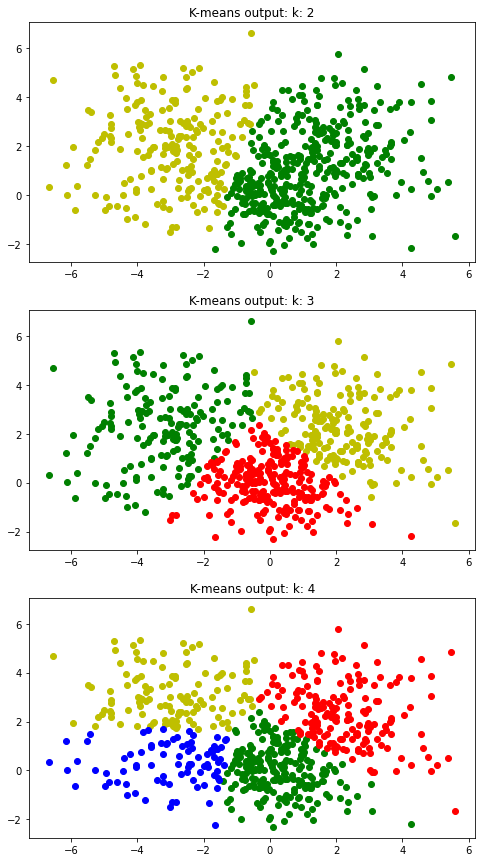

In [ ]:
#K-means algorithm
k_values = [2, 3, 4]

fig, axs = plt.subplots(3, 1, figsize=(8, 15))
axs.ravel()
for id, k in enumerate(k_values):

  j_min = float('inf')
  for _ in range(10): #random intialization

    #main intialization
    m = np.shape(X_data)[0]
    centroids = random.sample(X_data, k)
    centroids = [list(a) for a  in centroids]
    
    i = 0
    count = 0
    cost_val = []

    while i < 1500:
    
      clusters = [[] for _ in range(k)]
      j = 0

      for i in range(m): #m samples
        distances = []

        for a in range(k):#distance calculation
          distances.append(np.linalg.norm(X_data[i] - centroids[a]))

        c = np.argmin(distances)
        clusters[c].append(X_data[i])

        #distortion factor
        j = j + np.linalg.norm(X_data[i] - centroids[c])

      #updating centroids
      for cluster in range(k):
        if len(clusters[cluster]) != 0:
          X1 = np.mean([clusters[cluster][i][0] for i in range(len(clusters[cluster]))])
          X2 = np.mean([clusters[cluster][i][1] for i in range(len(clusters[cluster]))])
          centroids[cluster] = [X1, X2]

      cost_val.append(j)

      #Convergence checking
      if i > 4:
        if len(set(cost_val[i-4:i])) == 1:
          break

      i += 1

    #picking the least J or cost function from random intializations of centroids
    if j < j_min:
      j_min = j
      best_clusters = clusters

      
  #Plotting best clusters for different k values
  colors = {0: 'y', 1: 'g', 2: 'r', 3: 'b', 4: 'c'}
  for idx, cluster in enumerate(best_clusters):
    X1 = [cluster[i][0] for i in range(len(cluster))]
    X2 = [cluster[i][1] for i in range(len(cluster))]
    axs[id].scatter(X1, X2, color = colors[idx])
  axs[id].set_title('K-means output: k: {}'.format(k))

  print("K value: {}, Cost: {} ".format(k, j_min))


##Sklearn K-means

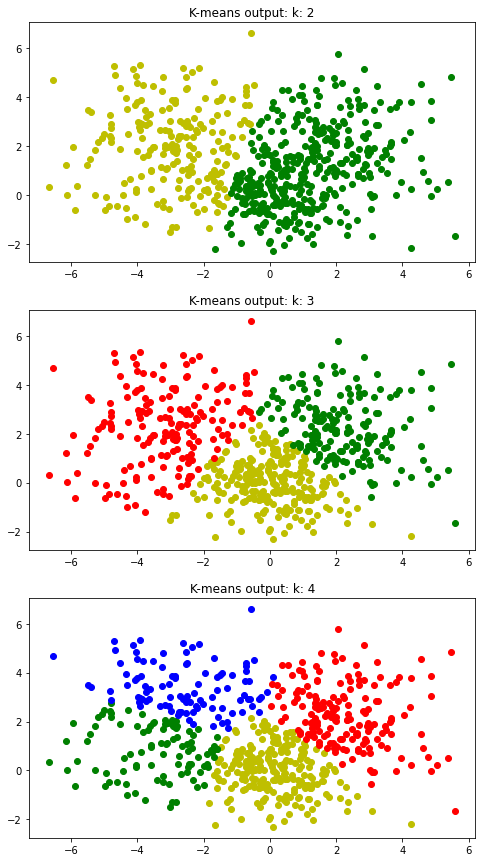

In [ ]:
from sklearn.cluster import KMeans

X_features = np.array(X_data)
colors = {0: 'y', 1: 'g', 2: 'r', 3: 'b', 4: 'c'}
fig, axs = plt.subplots(3, 1, figsize=(8, 15))
axs.ravel()

#Different k values
for id, k in enumerate(k_values):
  labels = KMeans(n_clusters = k).fit_predict(X_data)
  for idx in range(k):
    axs[id].scatter(X_features[labels == idx, 0], X_features[labels == idx, 1], color = colors[idx])
  axs[id].set_title('K-means output: k: {}'.format(k))

#Neural Networks

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print("Train images size: ", train_images.shape)
print("Test images size: ", test_images.shape)

Train images size:  (60000, 28, 28)
Test images size:  (10000, 28, 28)


In [ ]:
#processing the data: Normalizing the data
train_images = train_images / 255.0
test_images = test_images / 255.0

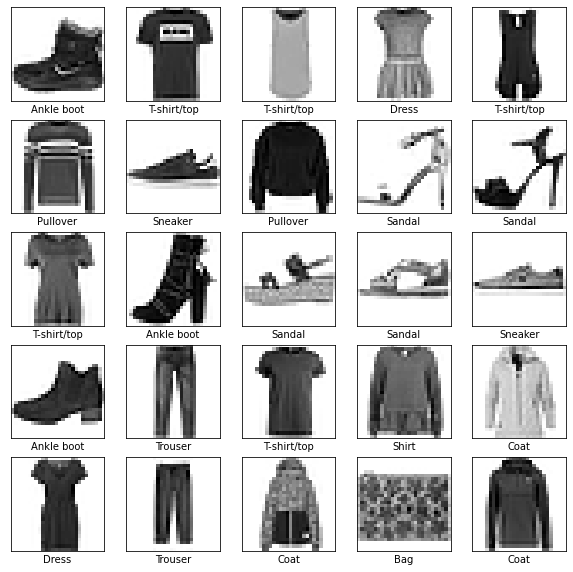

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Neural network
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs = 100, batch_size=128, verbose = 1)
model.evaluate(test_images, test_labels)

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 1.7158 - val_accuracy: 0.8900
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 1.7509 - val_accuracy: 0.8908
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 7.6106e-04 - accuracy: 0.9998 - val_loss: 1.7316 - val_accuracy: 0.8916
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 4.6387e-04 - accuracy: 0.9999 - val_loss: 1.7719 - val_accuracy: 0.8925
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 2.2058e-04 - accuracy: 1.0000 - val_loss: 1.7831 - val_accuracy: 0.8925
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 1.5090e-04 - accuracy: 1.0000 - val_loss: 1.8071 - val_accuracy: 0.8930
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 1.3150e-04 - accuracy: 1.0000 - val_loss: 1.8147 - 

[1.8460400104522705, 0.8902999758720398]

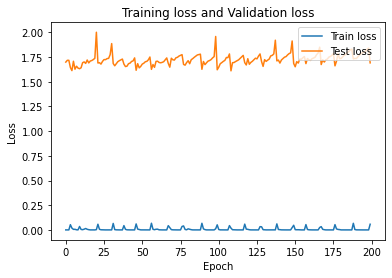

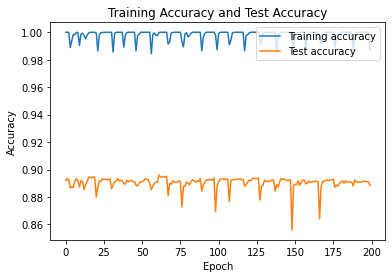

In [ ]:
#Loss plots
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training loss and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train loss', 'Test loss'], loc = 'upper right')
plt.show()

#Accuracy plots
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training Accuracy and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Test accuracy'], loc = 'upper right')
plt.show()